# The novel nucleoid-associated protein Gbn binds to GATC sequences and affects sporulation and antibiotic production in Streptomyces

Chao Du, Joost Willemse, Amanda M. Erkelens, Victor J. Carrion, Remus T. Dame, and Gilles P. van Wezel*

Centre for Microbial Cell Biology, Leiden University, The Netherlands
* Corresponding author: g.wezel@biology.leidenuniv.nl; Tel +31 71 5274310
 

## Data Loading

In [1]:
# Load functions
%load_ext autoreload
%autoreload 2
from ChIP_Expression import *

# Set plotting mode for notebook
%matplotlib inline
setDarkModePlotting(forceWhite=True)

# Set logger level. For more info: use logging.INFO
logshandler.setLevel(logging.WARNING)

# ChIPSeq data
peak25Df = parsePeakFile('ChIP_resultOnly/ChIP-25h_peaks.xls')
peak48Df = parsePeakFile('ChIP_resultOnly/ChIP-48h_peaks.xls')
peakOnly25Df = parseBedFile('ChIP_resultOnly/25-48_c5.0_cond1.bed')
peakOnly48Df = parseBedFile('ChIP_resultOnly/25-48_c5.0_cond2.bed')
peak2condCommonDf = parseBedFile('ChIP_resultOnly/25-48_c5.0_common.bed')

# Transcriptomics data
tpmDf = pd.read_csv('Transcriptomics/dataTables/TPM_Table_6a7aec.tsv', sep='\t', index_col=0)
tpmMeanDf = pd.read_csv('Transcriptomics/dataTables/mean_417110.tsv', sep='\t', index_col=0)
tpmVarDf = pd.read_csv('Transcriptomics/dataTables/var_417110.tsv', sep='\t', index_col=0)
tpmSemDf = pd.read_csv('Transcriptomics/dataTables/sem_417110.tsv', sep='\t', index_col=0)
vstTpmDf = pd.read_csv('Transcriptomics/dataTables/transformed/vst_2f3e41.tsv', sep='\t', index_col=0)
geneCompDict_shrink = readCompRes('Transcriptomics/dataTables/transformed/deseq2_comparisonResult_lfcShrink_22d17e_922b2a.tsv')

# Gene location info extracted from:
genomePath = 'M145.gb'

2021-11-10 09:30:13,664 [DEBUG] - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2021-11-10 09:30:13,666 [WARNING] - Change plot style to default


## Peak length analysis

In [2]:
# regulatory region define:
featDfPromo = annotationToBed(genomePath, relToRef=(-200,50))
# -200 to 50 give the most significant difference.
inFeatDfP25, inPeakDfP25, itFeatOlDfP25 = getIntersection(featDfPromo, peak25Df, intersect=True, overlap=0.5)
inFeatDfP48, inPeakDfP48, itFeatOlDfP48 = getIntersection(featDfPromo, peak48Df, intersect=True, overlap=0.5)

### Peak **Length** of the target region (-200 to 50) peaks are smaller than other peaks.

From the distribution plot, the longer peaks seems disappeared for those lies in the promoter region. This is a tendency, not definite.

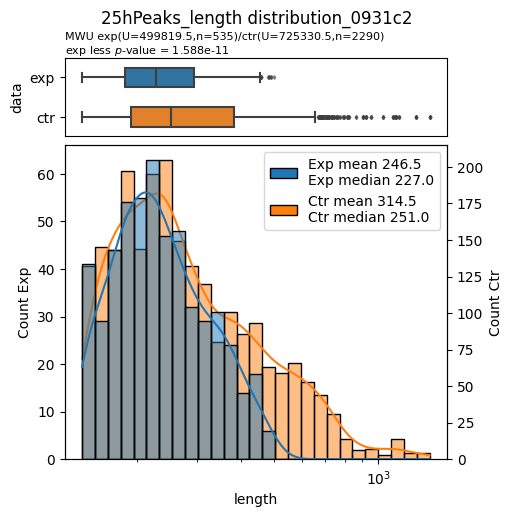

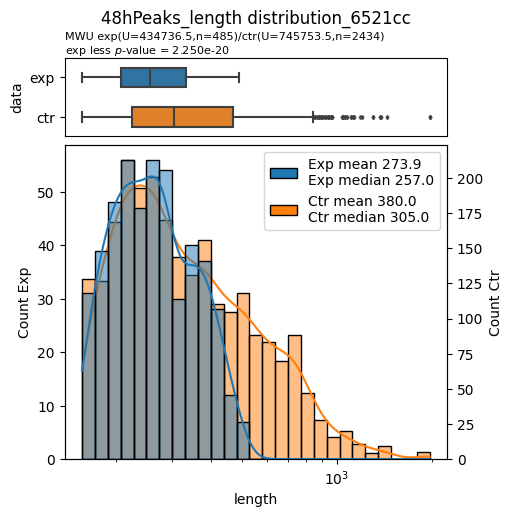

In [3]:
# First argument is the target set ids - "exp" in the figure
# Second argument is the data table, data from column of the third argument will be used
# Data not from "exp" set will be treated as "ctr" set in the figure
plotDistDiff(inPeakDfP25.index, peak25Df, 'length', log_scale=True, title='25hPeaks', figsize=(5,5))
plotDistDiff(inPeakDfP48.index, peak48Df, 'length', log_scale=True, title='48hPeaks', figsize=(5,5))

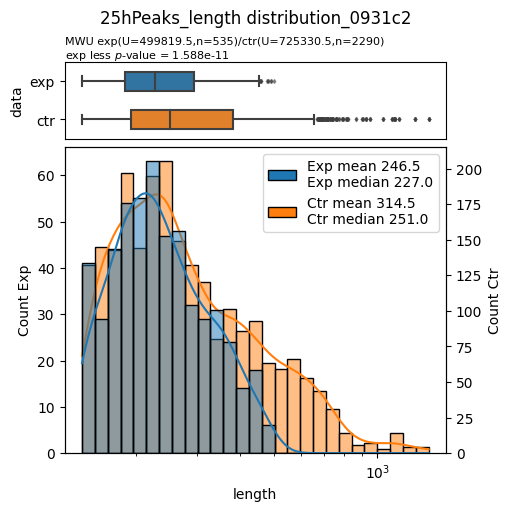

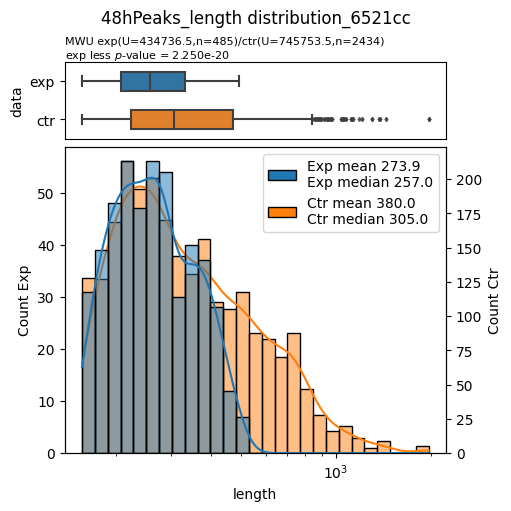

In [4]:
plotDistDiff(inPeakDfP25.index, peak25Df, 'length', log_scale=True, title='25hPeaks', figsize=(5,5))
plotDistDiff(inPeakDfP48.index, peak48Df, 'length', log_scale=True, title='48hPeaks', figsize=(5,5))

## Promoter region analysis

Promoter region defination: (-350 to +50) of the translation start site.

### Promoter region bound by Gbn genes express more and produce more proteins, especially in mutant

Supressive effect of Gbn. Note that Gbn and *gbn* is very low in 24 h, then increase.

Significance:  
24h>48h;  
&Delta;*gbn*>WT

In [5]:
# Re-calculate regulatory region based on new target region (-350, 50)
featDfPromo = annotationToBed(genomePath, relToRef=(-350,50))
inFeatDfP25, inPeakDfP25, itFeatOlDfP25 = getIntersection(featDfPromo, peak25Df, intersect=True, overlap=0.5)
inFeatDfP48, inPeakDfP48, itFeatOlDfP48 = getIntersection(featDfPromo, peak48Df, intersect=True, overlap=0.5)

In [6]:
# Output table for genes bound by Gbn both (inner) or at least (outer)
# one time at 25 and 48 hours ChIPSeq sample.
outer = 'join_binding_350_outer.xlsx'
inner = 'join_binding_350_inner.xlsx'
if not os.path.isfile(outer):
    pd.concat([itFeatOlDfP25, itFeatOlDfP48],
              axis=1,
              join='outer').to_excel(outer)
if not os.path.isfile(inner):
    pd.concat([itFeatOlDfP25, itFeatOlDfP48],
              axis=1,
              join='inner').to_excel(inner)

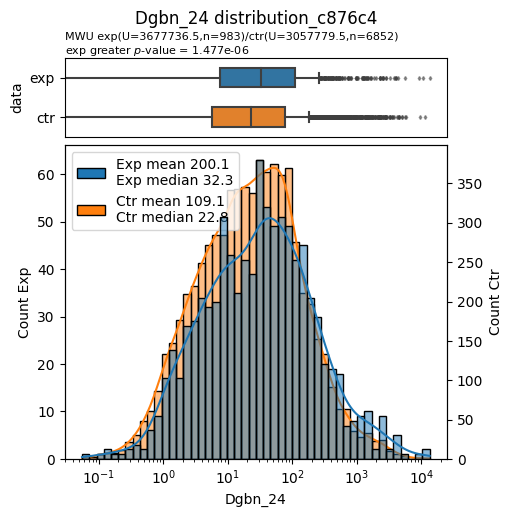

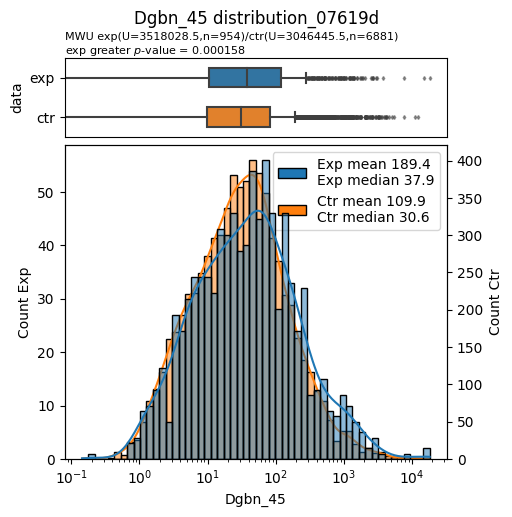

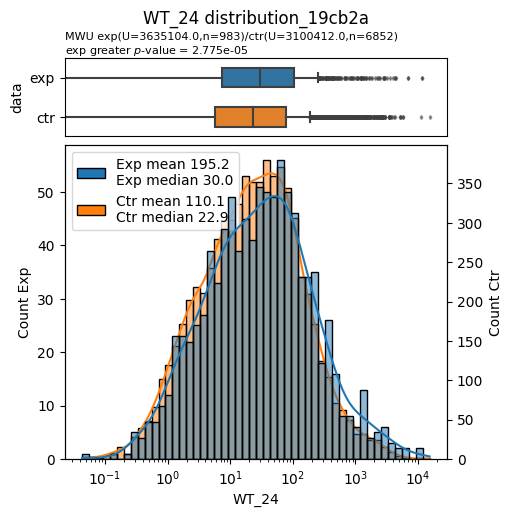

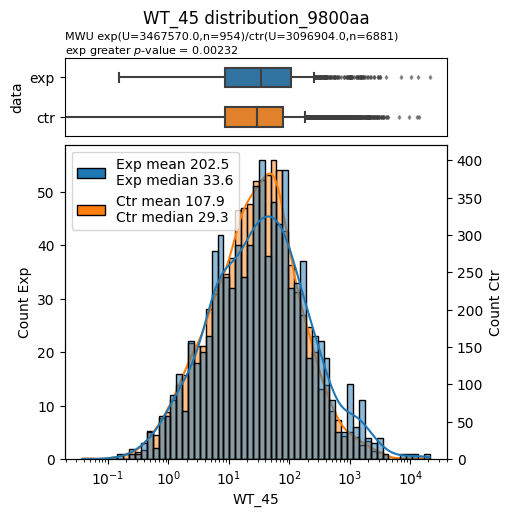

In [7]:
# Remove a gene that is ambigous on Gbn binding ChIPSeq analysis. This gene express
# too high thus might have significant influence on the mean.
newtpmMeanDf = tpmMeanDf.loc[~tpmMeanDf.index.str.contains('SCOs02'),:]
plotDistDiff(inFeatDfP25.index, newtpmMeanDf, 'Dgbn_24', figsize=(5,5))
plotDistDiff(inFeatDfP48.index, newtpmMeanDf, 'Dgbn_45', figsize=(5,5))
plotDistDiff(inFeatDfP25.index, newtpmMeanDf, 'WT_24', figsize=(5,5))
plotDistDiff(inFeatDfP48.index, newtpmMeanDf, 'WT_45', figsize=(5,5))

### Deletion of *gbn* leads to more positive log fold change for genes and proteins only when Gbn bound to the promoter region

This is shown and led by the increased number of higher expression genes and their products comparing mutant and wild type.

(coding region Gbn bound do not show difference, not shown here)

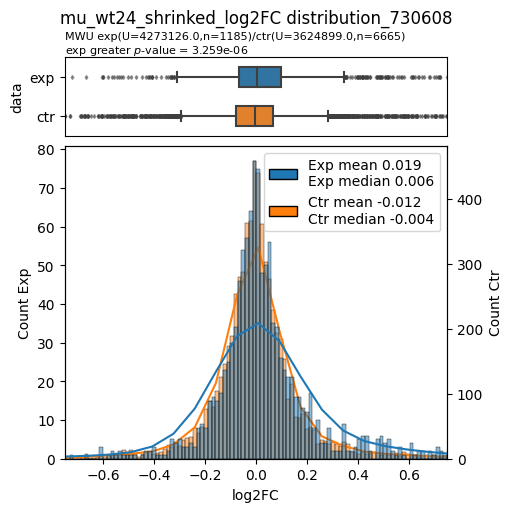

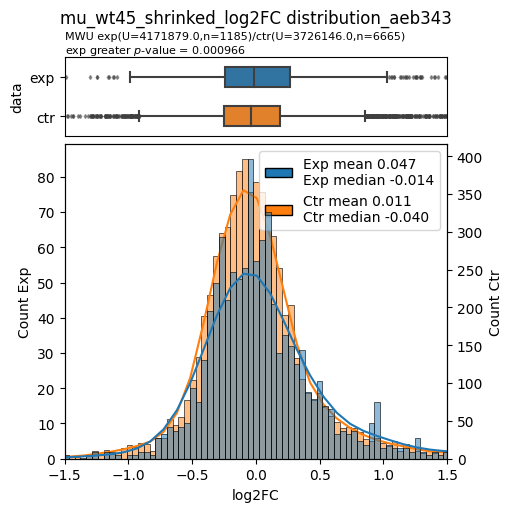

In [8]:
plotCompRes(inFeatDfP25.index.union(inFeatDfP48.index), geneCompDict_shrink,
            'mu_wt24', 'log2FC', title='_shrinked',
            log_scale=False, xlims=(-0.75, 0.75), figsize=(5,5))
plotCompRes(inFeatDfP48.index.union(inFeatDfP25.index), geneCompDict_shrink,
            'mu_wt45', 'log2FC', title='_shrinked',
            log_scale=False, xlims=(-1.5, 1.5), figsize=(5,5))
# Note the different xlims settings corresponding to the increased distance of 45 hour samples.